In [4]:
import warnings
warnings.filterwarnings('ignore')

import sys
import pandas
import numpy
import sklearn
import keras

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

# import the uci pima indians diabetes dataset
names = ['n_pregnant', 'glucose_concentration', 'blood_pressuer (mm Hg)', 'skin_thickness (mm)', 'serum_insulin (mu U/ml)',
        'BMI', 'pedigree_function', 'age', 'class']
df = pd.read_csv('diabetes.csv', names = names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
n_pregnant                 769 non-null object
glucose_concentration      769 non-null object
blood_pressuer (mm Hg)     769 non-null object
skin_thickness (mm)        769 non-null object
serum_insulin (mu U/ml)    769 non-null object
BMI                        769 non-null object
pedigree_function          769 non-null object
age                        769 non-null object
class                      769 non-null object
dtypes: object(9)
memory usage: 54.1+ KB


In [5]:
import sys
import sklearn
import keras

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# import the uci pima indians diabetes dataset
df.columns = df.iloc[0].values
df.drop(0,inplace=True)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768,768,768,768,768,768,768,768,768
unique,17,136,47,51,186,248,517,52,2
top,1,99,70,0,0,32,0.258,22,0
freq,135,17,57,227,374,13,6,72,500


In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df = df.reset_index()
df.drop('index',axis=1,inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
for x in df.columns.tolist():
    df[x] = pd.to_numeric(df[x])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


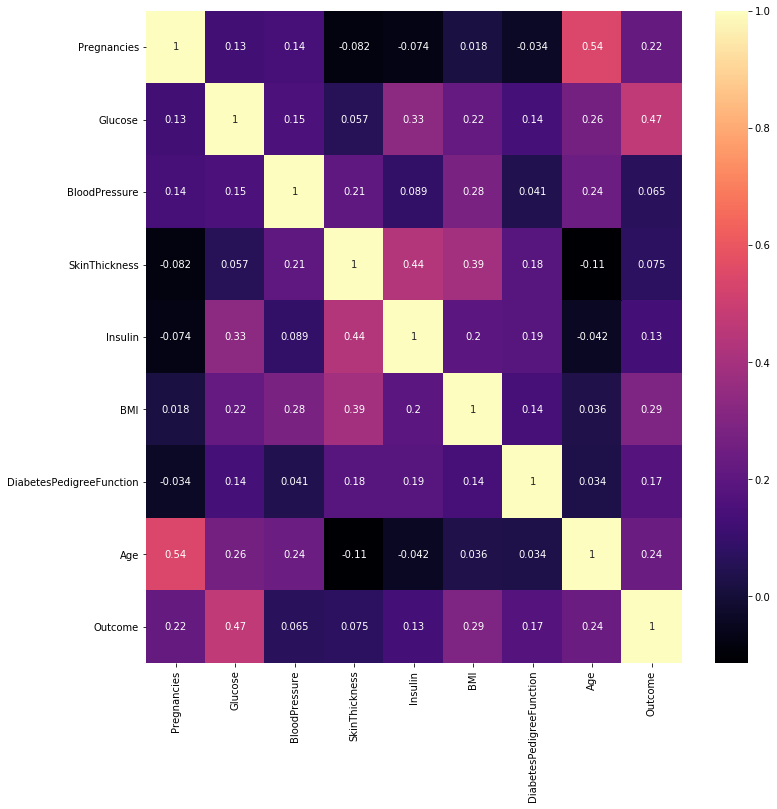

In [10]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='magma')

In [11]:
data = df
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Making predictions of zero values in each column**

In [13]:
gluc_0 = data[data['Glucose']==0]
gluc_0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [14]:
blood_0 = data[data['BloodPressure']==0]
blood_0.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1


In [15]:
skin_0 = data[data['SkinThickness']==0]
skin_0.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0


In [16]:
serum_0 = data[data['Insulin']==0]
serum_0.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0


In [18]:
bmi_0 = data[data['BMI']==0]
bmi_0.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0


In [19]:
ped_0 = data[data['DiabetesPedigreeFunction']==0]
ped_0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [20]:
age_0 = data[data['Age']==0]
age_0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [21]:
'''cols = ['glucose_concentration','blood_pressuer (mm Hg)','skin_thickness (mm)','serum_insulin (mu U/ml)','BMI']
for col in cols:
    df[col].replace(0,np.NaN,inplace=True)

df.describe()'''

"cols = ['glucose_concentration','blood_pressuer (mm Hg)','skin_thickness (mm)','serum_insulin (mu U/ml)','BMI']\nfor col in cols:\n    df[col].replace(0,np.NaN,inplace=True)\n\ndf.describe()"

In [22]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=1)

In [24]:
X = data.loc[data['BloodPressure']!=0,['Glucose','Pregnancies','DiabetesPedigreeFunction','Age']]
y = data.loc[data['BloodPressure']!=0,'BloodPressure']
X_poly = pf.fit_transform(X)
X_poly.shape,y.shape

((733, 5), (733,))

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_poly,y,random_state=42)
for x in (X_train,X_test,y_train,y_test):
    print(x.shape)

(549, 5)
(184, 5)
(549,)
(184,)


In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(X_train,y_train)

preds = lr.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,preds),mean_squared_error(y_test,preds)

(9.005821766350255, 132.48098333403274)

In [31]:
for i,j in zip(lr.predict(X_train),y_train.tolist()[:15]):
    print(j,'-->',i)

62 --> 66.22254275254866
66 --> 67.74386885916013
68 --> 70.72802300480373
68 --> 69.73260485161163
75 --> 67.16146850993576
86 --> 70.04766211288677
70 --> 83.39390759986632
88 --> 70.58435689890831
76 --> 78.21541384321303
82 --> 81.56870250002336
78 --> 69.35963300429405
72 --> 76.85935526066916
68 --> 68.9259060075099
74 --> 71.04818515473256
74 --> 69.4246844550735


In [32]:
data.loc[blood_0.index,'BloodPressure'] = lr.predict(pf.transform(data.loc[blood_0.index,['Glucose','Pregnancies','DiabetesPedigreeFunction','Age']]))

In [34]:
data[(data['SkinThickness']==0) & (data['Glucose']==0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [36]:
#pf = PolynomialFeatures(degree=3)
X = data.loc[data['BMI']!=0,['BloodPressure','Glucose','Pregnancies','DiabetesPedigreeFunction','Age']]
y = data.loc[data['BMI']!=0,'BMI']
'''X_poly = pf.fit_transform(X)'''
X.shape,y.shape

((757, 5), (757,))

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
for x in (X_train,X_test,y_train,y_test):
    print(x.shape)

(567, 5)
(190, 5)
(567,)
(190,)


In [38]:
lr = LinearRegression()

lr.fit(X_train,y_train)

preds = lr.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,preds),mean_squared_error(y_test,preds)

(4.756592388356895, 35.00728610413841)

In [39]:
for i,j in zip(preds,y_test.tolist()[:15]):
    print(j,'-->',i)

35.7 --> 36.44412327603429
26.1 --> 31.546729091979703
38.7 --> 35.93868965985319
33.3 --> 31.644419416303073
36.5 --> 33.26696489479738
29.3 --> 32.69840396350663
37.7 --> 32.90474379309313
34.0 --> 29.616197262827352
30.8 --> 30.49449447169968
30.4 --> 29.562017473279457
34.0 --> 33.08387042586818
28.4 --> 34.66601192016414
33.1 --> 31.716008576771202
36.9 --> 30.37198132555097
20.0 --> 31.567090271555372


In [40]:
mae_sum = 0
for p,t in zip(preds, y_test):
    mae_sum += abs(p - t)
mae = mae_sum / len(y_test)
mae

4.7565923883568955

In [42]:
data.loc[bmi_0.index,'BMI'] = lr.predict(data.loc[bmi_0.index,['BloodPressure','Glucose','Pregnancies','DiabetesPedigreeFunction','Age']])

data.loc[bmi_0.index,'BMI']

9      34.754266
49     31.620525
60     30.794345
81     29.890844
145    33.525529
371    34.991952
426    31.075837
494    30.304302
522    31.735462
684    32.993989
706    31.826706
Name: BMI, dtype: float64

In [44]:
pf = PolynomialFeatures(degree=2)
X = data.loc[data['SkinThickness']!=0,['BMI','BloodPressure','Glucose','Pregnancies','DiabetesPedigreeFunction','Age']]
y = data.loc[data['SkinThickness']!=0,'SkinThickness']
X_poly = pf.fit_transform(X)
X_poly.shape,y.shape

((541, 28), (541,))

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X_poly,y,random_state=42)
for x in (X_train,X_test,y_train,y_test):
    print(x.shape)

(405, 28)
(136, 28)
(405,)
(136,)


In [46]:
lr = LinearRegression()

lr.fit(X_train,y_train)

preds = lr.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,preds),mean_squared_error(y_test,preds)

(6.666262806679589, 93.77651611404166)

In [47]:
for i,j in zip(preds,y_test.tolist()[:15]):
    print(j,'-->',i)

32 --> 31.16704915750158
33 --> 31.16761990903815
18 --> 25.57640329587096
14 --> 28.714602025093072
18 --> 26.051909074704056
23 --> 23.821480341960893
18 --> 20.585284470293537
39 --> 32.479858951759
37 --> 32.51829093511563
23 --> 35.33968268247553
23 --> 25.63067507230035
23 --> 24.3794732509255
99 --> 28.986607713791045
34 --> 28.13810984545438
29 --> 29.709399724502504


In [48]:
data.loc[skin_0.index,'SkinThickness'] = lr.predict(pf.transform(data.loc[skin_0.index,['BMI','BloodPressure','Glucose','Pregnancies','DiabetesPedigreeFunction','Age']]))

In [49]:
data[data['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48.0,20.0,0,24.7,0.140,22,0
182,1,0,74.0,20.0,23,27.7,0.299,21,0
342,1,0,68.0,35.0,0,32.0,0.389,22,0
349,5,0,80.0,32.0,0,41.0,0.346,37,1
502,6,0,68.0,41.0,0,39.0,0.727,41,1


In [55]:
#pf = PolynomialFeatures(degree=3)
X = data.loc[data['Glucose']!=0,['SkinThickness','BMI','BloodPressure','Pregnancies','DiabetesPedigreeFunction','Age']]
y = data.loc[data['Glucose']!=0,'Glucose']
#X_poly = pf.fit_transform(X)
X.shape,y.shape

((763, 6), (763,))

In [56]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
for x in (X_train,X_test,y_train,y_test):
    print(x.shape)

lr = LinearRegression()

lr.fit(X_train,y_train)

preds = lr.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,preds),mean_squared_error(y_test,preds)

(572, 6)
(191, 6)
(572,)
(191,)


(22.821701698011232, 842.8549654996058)

In [57]:
for i,j in zip(preds,y_test.tolist()[:15]):
    print(j,'-->',i)

158 --> 135.64504202158497
141 --> 117.25957811213283
154 --> 128.73705223352252
158 --> 126.49370311659992
165 --> 129.2671487911262
111 --> 142.25141015974145
88 --> 111.11081952226598
129 --> 121.97151275783983
109 --> 149.8663689366129
119 --> 115.63912336327786
179 --> 140.52433751805842
138 --> 124.89542257871362
80 --> 109.04329646724753
179 --> 126.28051042381752
95 --> 115.94113827946256


In [58]:
data.loc[gluc_0.index,'Glucose'] = lr.predict(data.loc[gluc_0.index,['SkinThickness','BMI','BloodPressure','Pregnancies','DiabetesPedigreeFunction','Age']])

In [60]:
data[data['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [61]:
#pf = PolynomialFeatures(degree=3)
X = data.loc[data['Insulin']!=0,['Glucose','SkinThickness','BMI','BloodPressure','Pregnancies','DiabetesPedigreeFunction','Age']]
y = data.loc[data['Insulin']!=0,'Insulin']
#X_poly = pf.fit_transform(X)
X.shape,y.shape

((394, 7), (394,))

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
for x in (X_train,X_test,y_train,y_test):
    print(x.shape)

(295, 7)
(99, 7)
(295,)
(99,)


In [63]:
lr = LinearRegression()

lr.fit(X_train,y_train)

preds = lr.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,preds),mean_squared_error(y_test,preds)

(63.426265159513186, 7834.614191654705)

In [64]:
for i,j in zip(preds,y_test.tolist()[:15]):
    print(j,'-->',i)

105 --> 127.13741765348516
56 --> 77.04309434665177
328 --> 240.32647905714742
100 --> 271.3366230503263
510 --> 276.530739890016
87 --> 130.4075170150868
76 --> 27.07981040057058
210 --> 103.55977479381232
105 --> 154.90777174391252
192 --> 305.168323386705
235 --> 157.87776843706843
579 --> 275.90720144887166
66 --> 9.905072509645692
120 --> 115.57903466482139
105 --> 159.17850060105224


In [65]:
data.loc[serum_0.index,'Insulin'] = lr.predict(data.loc[serum_0.index,['Glucose','SkinThickness','BMI','BloodPressure','Pregnancies','DiabetesPedigreeFunction','Age']])

In [66]:
X = data.iloc[:,:8]
y = data.iloc[:,8]
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc.fit(X)
X_sc = sc.transform(X)
print(X_sc.shape,y.shape)

(768, 8) (768,)


In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sc,y)
for x in (X_train,X_test,y_train,y_test):
    print(x.shape)

(576, 8)
(192, 8)
(576,)
(192,)


In [69]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

preds = clf.predict(X_test)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=y_test,y_pred=preds)

array([[100,  32],
       [ 26,  34]], dtype=int64)

In [71]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=1000)

clf.fit(X_train,y_train)

preds = clf.predict(X_test)

confusion_matrix(y_true=y_test,y_pred=preds)

array([[113,  19],
       [ 26,  34]], dtype=int64)

In [72]:
confusion_matrix(y_true=y_train,y_pred=clf.predict(X_train))

array([[368,   0],
       [  0, 208]], dtype=int64)

**Random forest with n_estimators=1000 results in overfitting**

In [73]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train,y_train)

preds = clf.predict(X_test)

confusion_matrix(y_true=y_test,y_pred=preds)

array([[104,  28],
       [ 27,  33]], dtype=int64)

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = data.iloc[:,:8]
y = data.iloc[:,8]
print(X.shape,y.shape)

X_standardized = scaler.fit_transform(X)

data2 = pd.DataFrame(X_standardized)
data2.describe()

(768, 8) (768,)


,0,1,2,3,4,5,6,7
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,-3.028538e-16,-2.627745e-16,-3.546787e-16,-1.663889e-16,2.602808e-16,2.398978e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.551702e+00,-3.993058e+00,-2.304168e+00,-1.659674e+00,-2.073576e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-7.198698e-01,-6.904122e-01,-7.171463e-01,-6.575655e-01,-7.205686e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.530695e-01,-2.988302e-02,8.578996e-03,-2.042117e-01,-2.951630e-02,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.108786e-01,6.306462e-01,6.393281e-01,3.817754e-01,6.033421e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.541285e+00,4.098424e+00,7.367319e+00,7.042127e+00,5.040625e+00,5.883565e+00,4.063716e+00


In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_standardized,y)
for x in (X_train,X_test,y_train,y_test):
    print(x.shape)

(576, 8)
(192, 8)
(576,)
(192,)


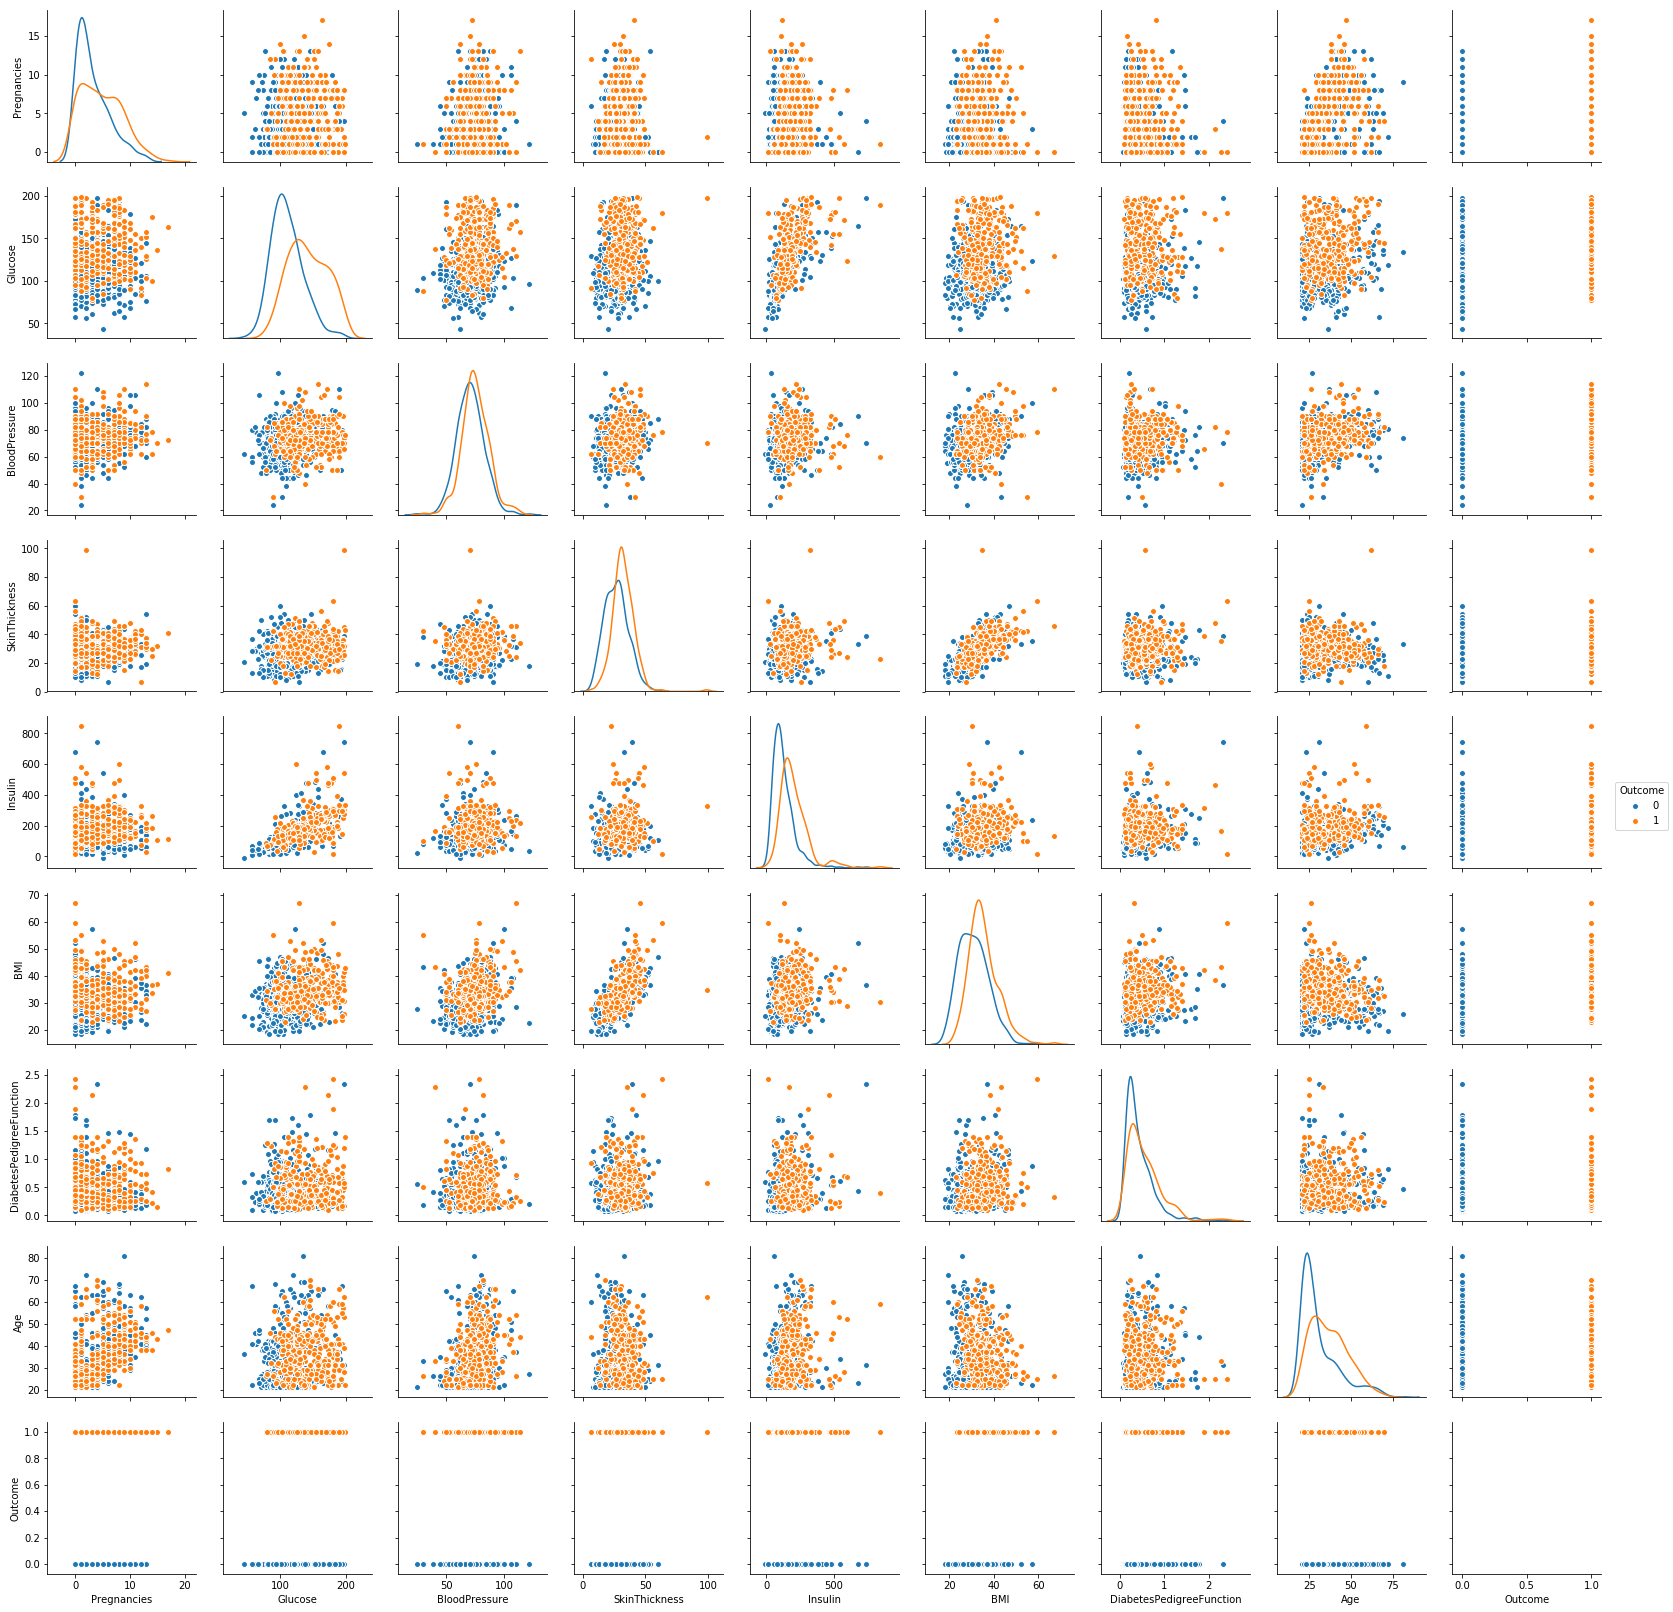

In [78]:
#df.dropna(inplace=True)
sns.pairplot(data,hue='Outcome',diag_kind='kde')

In [ ]:
df.drop('blood_pressuer (mm Hg)',inplace=True,axis=1)

df.describe()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
dataset = df.values
dataset.shape

In [ ]:
X = dataset[:,:7]
y = dataset[:,7]
print(X.shape,y.shape)

X_standardized = scaler.fit_transform(X)

data = pd.DataFrame(X_standardized)
data.describe()

In [ ]:
from sklearn.model_selection import GridSearchCV,KFold

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [ ]:
X_standardized.shape,y.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_standardized,y)
for x in (X_train,X_test,y_train,y_test):
    print(x.shape)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

preds = clf.predict(X_test)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=y_test,y_pred=preds)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,max_depth=10)

clf.fit(X_train,y_train)

preds = clf.predict(X_test)

confusion_matrix(y_true=y_test,y_pred=preds)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

clf.fit(X_train,y_train)

preds = clf.predict(X_test)

confusion_matrix(y_true=y_test,y_pred=preds)

In [ ]:
# Do a grid search for the optimal batch size and number of epochs
# import necessary packages
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

# Define a random seed
seed = 6
np.random.seed(seed)

# Start defining the model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(4, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, verbose = 1)

# define the grid search parameters
batch_size = [10, 20, 40]
epochs = [10, 50, 100]

# make a dictionary of the grid search parameters
param_grid = dict(batch_size=batch_size, epochs=epochs)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), verbose = 10)
grid_results = grid.fit(X_train, y_train)

# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam
# Define a random seed
seed = 6
np.random.seed(seed)

# Start defining the model
def create_model(learn_rate, dropout_rate):
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4, input_dim = 8, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    adam = Adam(lr = learn_rate)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, epochs = 100, batch_size = 20, verbose = 0)

# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1]
dropout_rate = [0.0, 0.1, 0.2]

# make a dictionary of the grid search parameters
param_grid = dict(learn_rate=learn_rate, dropout_rate=dropout_rate)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), verbose = 10)
grid_results = grid.fit(X_train, y_train)

# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

In [ ]:
# Do a grid search to find the optimal number of neurons in each hidden layer
# import necessary packages

# Define a random seed
seed = 6
np.random.seed(seed)

# Start defining the model
def create_model(neuron1, neuron2):
    # create model
    model = Sequential()
    model.add(Dense(neuron1, input_dim = 8, kernel_initializer= 'uniform', activation= 'linear'))
    model.add(Dense(neuron2, input_dim = neuron1, kernel_initializer= 'uniform', activation= 'linear'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile the model
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics = ['accuracy'])
    return model

# create the model
model = KerasClassifier(build_fn = create_model, epochs = 100, batch_size = 20, verbose = 0)

# define the grid search parameters
neuron1 = [4, 8, 16]
neuron2 = [2, 4, 8]

# make a dictionary of the grid search parameters
param_grid = dict(neuron1 = neuron1, neuron2 = neuron2)

# build and fit the GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = KFold(random_state=seed), refit = True, verbose = 10)
grid_results = grid.fit(X_train, y_train)

# summarize the results
print("Best: {0}, using {1}".format(grid_results.best_score_, grid_results.best_params_))
means = grid_results.cv_results_['mean_test_score']
stds = grid_results.cv_results_['std_test_score']
params = grid_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{0} ({1}) with: {2}'.format(mean, stdev, param))

In [ ]:
y_pred = grid.predict(X_test)

y_pred.shape

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

sc = StandardScaler()

sc.fit(data.loc[data['glucose_concentration']!=0,['glucose_concentration','n_pregnant','pedigree_function','age','class']])

data.loc[data['glucose_concentration']!=0,['glucose_concentration','n_pregnant','pedigree_function','age','class']] = sc.transform(data.loc[data['glucose_concentration']!=0,['glucose_concentration','n_pregnant','pedigree_function','age','class']])

X = data.loc[data['glucose_concentration']!=0,['n_pregnant','pedigree_function','age','class']]
y = data.loc[data['glucose_concentration']!=0,'glucose_concentration']
print(X.shape,y.shape)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

lr.fit(X_train,y_train.values)

gluc_0['glucose_concentration'].values

from sklearn.metrics import mean_squared_error
print("Mean squared error:\t",mean_squared_error(y_test,lr.predict(X_test)))

#lr.predict(sc.transform(gluc_0[['n_pregnant','pedigree_function','age','class']]))

'''data.loc[gluc_0.index,'glucose_concentration'] = lr.predict(sc.transform(gluc_0[['n_pregnant','pedigree_function','age','class']]))
data.loc[gluc_0.index]'''

In [ ]:
lr.predict(X_test)[:15]

In [ ]:
y_test.tolist()[:15]

In [ ]:
sc = StandardScaler()

sc.fit(data.loc[data['blood_pressuer (mm Hg)']!=0,['blood_pressuer (mm Hg)','glucose_concentration','n_pregnant','pedigree_function','age','class']])

data.loc[data['blood_pressuer (mm Hg)']!=0,['blood_pressuer (mm Hg)','glucose_concentration','n_pregnant','pedigree_function','age','class']] = sc.transform(data.loc[data['blood_pressuer (mm Hg)']!=0,['blood_pressuer (mm Hg)','glucose_concentration','n_pregnant','pedigree_function','age','class']])

X = data.loc[data['blood_pressuer (mm Hg)']!=0,['n_pregnant','pedigree_function','age','class']]
y = data.loc[data['blood_pressuer (mm Hg)']!=0,'blood_pressuer (mm Hg)']
print(X.shape,y.shape)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

print(blood_0.shape)

'''sc = StandardScaler()
sc.fit(X)

X = sc.transform(X)

lr.fit(X,y.values)

lr.predict(sc.transform(blood_0[['n_pregnant','pedigree_function','age','class']]))'''
lr.fit(X_train,y_train.values)

gluc_0['glucose_concentration'].values

from sklearn.metrics import mean_squared_error
print("Mean squared error:\t",mean_squared_error(y_test,lr.predict(X_test)))

'''data.loc[blood_0.index,'blood_pressuer (mm Hg)'] = lr.predict(sc.transform(blood_0[['n_pregnant','pedigree_function','age','class']]))
data.loc[blood_0.index].head()'''

In [ ]:
lr.predict(X_test)[:15]

In [ ]:
y_test.tolist()[:15]

In [ ]:
sc = StandardScaler()

sc.fit(data.loc[data['skin_thickness (mm)']!=0,['skin_thickness (mm)','blood_pressuer (mm Hg)','glucose_concentration','n_pregnant','pedigree_function','age','class']])

data.loc[data['skin_thickness (mm)']!=0,['skin_thickness (mm)','blood_pressuer (mm Hg)','glucose_concentration','n_pregnant','pedigree_function','age','class']] = sc.transform(data.loc[data['skin_thickness (mm)']!=0,['skin_thickness (mm)','blood_pressuer (mm Hg)','glucose_concentration','n_pregnant','pedigree_function','age','class']])

X = data.loc[data['skin_thickness (mm)']!=0,['blood_pressuer (mm Hg)','n_pregnant','pedigree_function','age','class']]
y = data.loc[data['skin_thickness (mm)']!=0,'skin_thickness (mm)']
print(X.shape,y.shape)

'''sc = StandardScaler()
sc.fit(X)

X = sc.transform(X)

lr.fit(X,y.values)

data.loc[skin_0.index,'skin_thickness (mm)'] = lr.predict(sc.transform(skin_0[['blood_pressuer (mm Hg)','n_pregnant','pedigree_function','age','class']]))
data.loc[skin_0.index].head()'''
lr.fit(X_train,y_train.values)

gluc_0['glucose_concentration'].values

from sklearn.metrics import mean_squared_error
print("Mean squared error:\t",mean_squared_error(y_test,lr.predict(X_test)))

In [ ]:
sc = StandardScaler()

sc.fit(data.loc[data['serum_insulin (mu U/ml)']!=0,['serum_insulin (mu U/ml)','skin_thickness (mm)','blood_pressuer (mm Hg)','glucose_concentration','n_pregnant','pedigree_function','age','class']])

data.loc[data['serum_insulin (mu U/ml)']!=0,['serum_insulin (mu U/ml)','skin_thickness (mm)','blood_pressuer (mm Hg)','glucose_concentration','n_pregnant','pedigree_function','age','class']] = sc.transform(data.loc[data['serum_insulin (mu U/ml)']!=0,['serum_insulin (mu U/ml)','skin_thickness (mm)','blood_pressuer (mm Hg)','glucose_concentration','n_pregnant','pedigree_function','age','class']])

X = data.loc[data['serum_insulin (mu U/ml)']!=0,['skin_thickness (mm)','n_pregnant','pedigree_function','age','class']]
y = data.loc[data['serum_insulin (mu U/ml)']!=0,'serum_insulin (mu U/ml)']
print(X.shape,y.shape)

'''sc = StandardScaler()
sc.fit(X)

X = sc.transform(X)

lr.fit(X,y.values)

data.loc[serum_0.index,'serum_insulin (mu U/ml)'] = lr.predict(sc.transform(serum_0[['n_pregnant','pedigree_function','age','class']]))
data.loc[serum_0.index].head()'''
lr.fit(X_train,y_train.values)

gluc_0['glucose_concentration'].values

from sklearn.metrics import mean_squared_error
print("Mean squared error:\t",mean_squared_error(y_test,lr.predict(X_test)))

In [ ]:
sc = StandardScaler()

sc.fit(data.loc[data['BMI']!=0,['BMI','serum_insulin (mu U/ml)','skin_thickness (mm)','blood_pressuer (mm Hg)','glucose_concentration','n_pregnant','pedigree_function','age','class']])

data.loc[data['BMI']!=0,['BMI','serum_insulin (mu U/ml)','skin_thickness (mm)','blood_pressuer (mm Hg)','glucose_concentration','n_pregnant','pedigree_function','age','class']] = sc.transform(data.loc[data['BMI']!=0,['BMI','serum_insulin (mu U/ml)','skin_thickness (mm)','blood_pressuer (mm Hg)','glucose_concentration','n_pregnant','pedigree_function','age','class']])

X = data.loc[data['BMI']!=0,['serum_insulin (mu U/ml)','skin_thickness (mm)','blood_pressuer (mm Hg)','glucose_concentration','n_pregnant','pedigree_function','age','class']]
y = data.loc[data['BMI']!=0,'BMI']
print(X.shape,y.shape)

print(bmi_0.shape)

'''sc = StandardScaler()
sc.fit(X)

X = sc.transform(X)

lr.fit(X,y.values)

data.loc[bmi_0.index,'BMI'] = lr.predict(sc.transform(bmi_0[['n_pregnant','pedigree_function','age','class']]))
data.loc[bmi_0.index].head()'''
lr.fit(X_train,y_train.values)

gluc_0['glucose_concentration'].values

from sklearn.metrics import mean_squared_error
print("Mean squared error:\t",mean_squared_error(y_test,lr.predict(X_test)))

In [ ]:
data.head()

In [ ]:
data = sc.inverse_transform(data)

In [ ]:
pd.DataFrame(data)

In [ ]:
sns.pairplot(data,hue='class',diag_kind='kde')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

preds = clf.predict(X_test)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=y_test,y_pred=preds)

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,cmap='magma')

In [ ]:
#data.loc[skin_0.index,'skin_thickness (mm)']